In [1]:
import torch


In [28]:
N = 10
dM = 768
x = torch.rand(N, dM)
mean = x.mean(0)
mean.shape

torch.Size([768])

In [30]:

y = mean[None, :].expand(N, -1)
y.shape
y


tensor([[0.6341, 0.3482, 0.3873,  ..., 0.5538, 0.5781, 0.6489],
        [0.6341, 0.3482, 0.3873,  ..., 0.5538, 0.5781, 0.6489],
        [0.6341, 0.3482, 0.3873,  ..., 0.5538, 0.5781, 0.6489],
        ...,
        [0.6341, 0.3482, 0.3873,  ..., 0.5538, 0.5781, 0.6489],
        [0.6341, 0.3482, 0.3873,  ..., 0.5538, 0.5781, 0.6489],
        [0.6341, 0.3482, 0.3873,  ..., 0.5538, 0.5781, 0.6489]])

In [7]:
cov = (1/(N-1))*(x.T@x)
cov.shape

torch.Size([768, 768])

In [10]:
eigvals = torch.linalg.eigvals(cov)
eigvals.shape

torch.Size([768])

In [2]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np

#variable n below should be number of curves to plot

#version 1:
n = 3
color = cm.rainbow(np.linspace(0, 1, n))


In [3]:
color

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [5]:
from matplotlib.cm import get_cmap

name = "Accent"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
len(colors)

8

In [12]:
import matplotlib.colors as mcolors
for x in mcolors.CSS4_COLORS.values():
    print(x)

#F0F8FF
#FAEBD7
#00FFFF
#7FFFD4
#F0FFFF
#F5F5DC
#FFE4C4
#000000
#FFEBCD
#0000FF
#8A2BE2
#A52A2A
#DEB887
#5F9EA0
#7FFF00
#D2691E
#FF7F50
#6495ED
#FFF8DC
#DC143C
#00FFFF
#00008B
#008B8B
#B8860B
#A9A9A9
#006400
#A9A9A9
#BDB76B
#8B008B
#556B2F
#FF8C00
#9932CC
#8B0000
#E9967A
#8FBC8F
#483D8B
#2F4F4F
#2F4F4F
#00CED1
#9400D3
#FF1493
#00BFFF
#696969
#696969
#1E90FF
#B22222
#FFFAF0
#228B22
#FF00FF
#DCDCDC
#F8F8FF
#FFD700
#DAA520
#808080
#008000
#ADFF2F
#808080
#F0FFF0
#FF69B4
#CD5C5C
#4B0082
#FFFFF0
#F0E68C
#E6E6FA
#FFF0F5
#7CFC00
#FFFACD
#ADD8E6
#F08080
#E0FFFF
#FAFAD2
#D3D3D3
#90EE90
#D3D3D3
#FFB6C1
#FFA07A
#20B2AA
#87CEFA
#778899
#778899
#B0C4DE
#FFFFE0
#00FF00
#32CD32
#FAF0E6
#FF00FF
#800000
#66CDAA
#0000CD
#BA55D3
#9370DB
#3CB371
#7B68EE
#00FA9A
#48D1CC
#C71585
#191970
#F5FFFA
#FFE4E1
#FFE4B5
#FFDEAD
#000080
#FDF5E6
#808000
#6B8E23
#FFA500
#FF4500
#DA70D6
#EEE8AA
#98FB98
#AFEEEE
#DB7093
#FFEFD5
#FFDAB9
#CD853F
#FFC0CB
#DDA0DD
#B0E0E6
#800080
#663399
#FF0000
#BC8F8F
#4169E1
#8B4513
#FA8072


torch.Size([1024, 3])


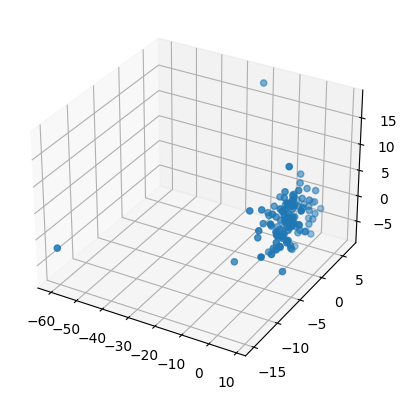

In [9]:
from torch.distributions.multivariate_normal import MultivariateNormal as MVN
import torch 
import matplotlib.pyplot as plt 
import numpy as np
d = 3 
M = 1024

# mean = torch.from_numpy(np.load('mean.npy'))
mean = mean = torch.ones(d*M) * 0
covariance = torch.from_numpy(np.load('cov.npy'))
# diag = torch.from_numpy(np.array(list(range(2700,3000)))) + 0.1
# diag = torch.concat([torch.ones(2700),diag])
# covariance = torch.diag(diag) 
mvn = MVN(mean, covariance)

sample = mvn.sample().reshape((M,d))
print(sample.shape)

# M = int(sample.shape[1]//3)
# sample = sample.reshape((-1, 3))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(sample[:,0], sample[:,1], sample[:,2])
plt.show()


# d = 2
# M = 100

# mean = torch.zeros(d*M)
# covariance = torch.eye(d*M)*10

# mvn = MVN(mean, covariance)

# sample = mvn.sample().reshape((M,d))
# plt.figure()
# plt.scatter(sample[:,0],sample[:,1])
# plt.show()

In [2]:
diag

tensor([1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 2.9971e+03, 2.9981e+03,
        2.9991e+03])

In [1]:
import seaborn as sns
import numpy as np


In [5]:
d, M = 3, 128
mean = np.ones(d*M)
covariance = np.eye(d*M)
np.random.seed(11)

z = np.random.multivariate_normal(mean=mean, cov=covariance, size=100)
y = np.transpose(z)
z.shape
N = 100

In [7]:
x = np.random.rand(N, M, d)
y = y = x.reshape((N, -1))
y.shape

(100, 384)

In [3]:
from sklearn.decomposition import PCA
pca_samp = PCA(n_components=2).fit(z)
t = pca_samp.transform(z)
t.shape

(100, 2)

/home/sci/nawazish.khan/miniconda3/envs/shapeworks/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sci/nawazish.khan/miniconda3/envs/shapeworks/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

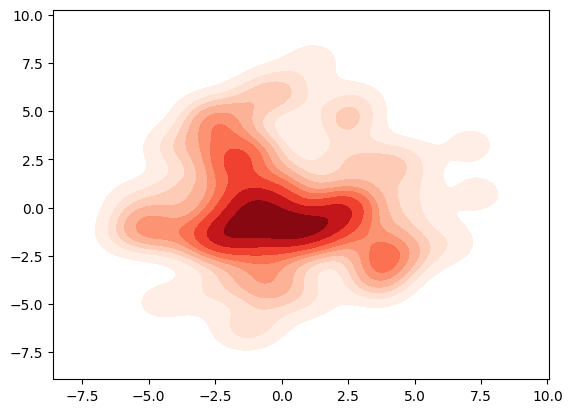

In [4]:
sns.kdeplot(t[:, 0], t[:, 1], shade=True, cmap='Reds', bw=0.3, gridsize=200)

In [30]:
import torch
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal as MVN


In [41]:
d, M = 3, 128
mean = torch.ones(d*M)
cov = torch.eye(d*M)
dist = MVN(mean, cov)

In [57]:
n = 768

xmin, xmax = -100, 100
ymin, ymax = -100, 100
xx1 = torch.linspace(xmin, xmax, n)
xx2 = torch.linspace(ymin, ymax, n)


In [51]:
xx, yy = torch.meshgrid(xx1, xx2)
xx.shape

torch.Size([768, 768])

In [58]:
xy = torch.stack((xx.flatten(), yy.flatten()), dim=0)
xy.shape

torch.Size([2, 589824])

In [46]:
density = dist.log_prob(xy).exp()
print(f"shape of density is {density.shape}")

ax.contour(xx, yy, density.view(n,n).data.numpy())

ValueError: The right-most size of value must match event_shape: torch.Size([1056, 2]) vs torch.Size([384]).

In [8]:
import torch

from torch.distributions.multivariate_normal import MultivariateNormal as MVN


In [9]:
dM = 64 * 3

In [10]:
base_dist = MVN(torch.zeros(dM), torch.eye(dM))

In [11]:
zs = torch.rand(10, dM)

In [13]:
x = base_dist.log_prob(zs)
x.shape

torch.Size([10])

In [15]:
y = x.view(zs.size(0), -1)
y.shape

torch.Size([10, 1])

In [18]:
t = y.sum(1)
t.shape

torch.Size([10])

In [2]:
x = torch.zeros(128)
i = 0
while i < 128:
    x[i:i+3] = i%2
    i += 3

In [7]:
dM = 32 * 3

x  = torch.rand(dM)
y = torch.rand(dM)

p = [x, y]
q = torch.stack(p)
q.shape


torch.Size([2, 96])

In [22]:
z = x[:, 0::2:4]
z

SyntaxError: invalid syntax (1672899930.py, line 1)

In [21]:
t = x[:, 1::2]
t

tensor([[0.5498, 0.0707, 0.1101, 0.1010, 0.9992, 0.0841, 0.1766, 0.1698, 0.5809,
         0.8311, 0.0582, 0.6477, 0.4272, 0.3576, 0.9754, 0.2939, 0.2617, 0.2017,
         0.1088, 0.4390, 0.0176, 0.8328, 0.3366, 0.2783, 0.5001, 0.4872, 0.4351,
         0.9347, 0.0403, 0.1121, 0.8537, 0.4967, 0.6863, 0.2958, 0.9899, 0.5171,
         0.8916, 0.0057, 0.3592, 0.6670, 0.0150, 0.0013, 0.4060, 0.7492, 0.8272,
         0.0630, 0.1775, 0.4950],
        [0.9423, 0.7943, 0.9066, 0.0246, 0.8209, 0.9957, 0.4213, 0.2455, 0.8464,
         0.3995, 0.4994, 0.4045, 0.6107, 0.6195, 0.0708, 0.8757, 0.9547, 0.1603,
         0.5819, 0.6191, 0.2903, 0.6469, 0.9059, 0.9779, 0.0310, 0.5903, 0.4997,
         0.4855, 0.3856, 0.8407, 0.8424, 0.7422, 0.0580, 0.4232, 0.2644, 0.6655,
         0.3115, 0.7360, 0.9657, 0.4328, 0.0527, 0.9095, 0.4759, 0.0620, 0.1881,
         0.7244, 0.0772, 0.2068],
        [0.7520, 0.8990, 0.4717, 0.8666, 0.5468, 0.3816, 0.7056, 0.6202, 0.2324,
         0.1437, 0.3190, 0.5563, 0.6780, 